In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
import seaborn as sns 
sns.set()
from sklearn.cluster import KMeans

In [3]:
raw_data = pd.read_csv("Countries.csv")

In [4]:
raw_data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


### Plotting the data

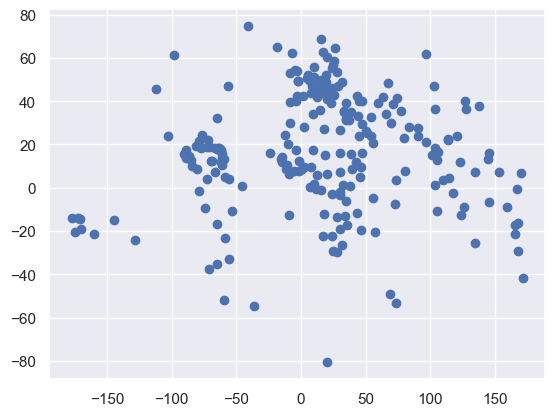

In [5]:
plt.scatter(raw_data["Longitude"], raw_data["Latitude"])


### Selecting the features

In [6]:
cluster_data = raw_data.iloc[:,[1,2]]

In [7]:
cluster_data.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


### Standardize the variables

In [9]:
ss = StandardScaler()
cluster_data = pd.DataFrame(ss.fit_transform(cluster_data), columns=['Longitude', 'Latitude'])


### Clustering

In [10]:
kmeans = KMeans(4)

In [11]:
kmeans.fit(cluster_data)

KMeans(n_clusters=4)

In [12]:
identified_clusters = kmeans.fit_predict(cluster_data)


In [13]:
identified_clusters

array([1, 3, 2, 1, 0, 0, 0, 3, 1, 0, 1, 2, 2, 2, 1, 2, 0, 0, 3, 0, 3, 3,
       3, 0, 3, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 3, 2, 3, 0, 1, 3, 3, 3,
       3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 3, 1, 3, 3,
       0, 0, 3, 0, 2, 1, 0, 0, 2, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 1, 0, 1,
       2, 1, 3, 2, 1, 0, 1, 0, 2, 0, 3, 2, 2, 0, 3, 3, 0, 3, 0, 1, 0, 3,
       3, 3, 0, 3, 0, 3, 1, 1, 3, 0, 3, 3, 0, 3, 3, 1, 0, 3, 2, 0, 0, 0,
       3, 1, 0, 0, 0, 2, 3, 1, 2, 0, 3, 0, 3, 0, 0, 2, 2, 3, 1, 2, 2, 2,
       2, 2, 3, 2, 3, 1, 1, 0, 0, 3, 2, 2, 3, 3, 1, 1, 1, 2, 2, 2, 0, 1,
       3, 0, 1, 3, 1, 3, 0, 0, 3, 3, 3, 3, 3, 3, 2, 1, 1, 2, 3, 1, 0, 3,
       3, 0, 0, 3, 1, 0, 0, 0, 2, 1, 2, 0, 1, 3, 3, 3, 0, 0, 2, 1, 1, 0,
       0, 3, 2, 3, 0, 1, 1, 0, 0, 1, 1, 1, 1, 3, 2, 1, 1, 3, 2, 2, 2],
      dtype=int32)

### Clustering results

In [15]:
new_data = raw_data.copy()
new_data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [16]:
new_data["clusterNo"] = identified_clusters

In [17]:
new_data.head()

,name,Longitude,Latitude,clusterNo
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,3
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,0


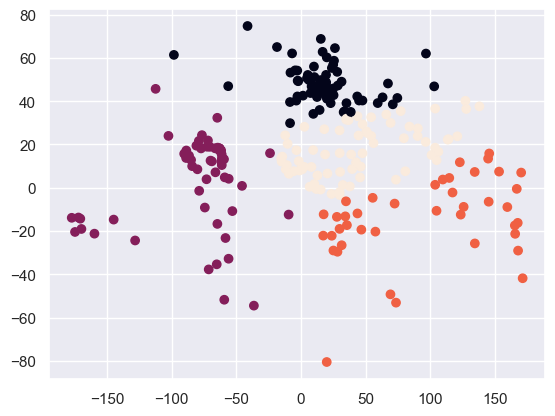

In [24]:
plt.scatter(new_data["Longitude"], new_data["Latitude"], c=new_data["clusterNo"])

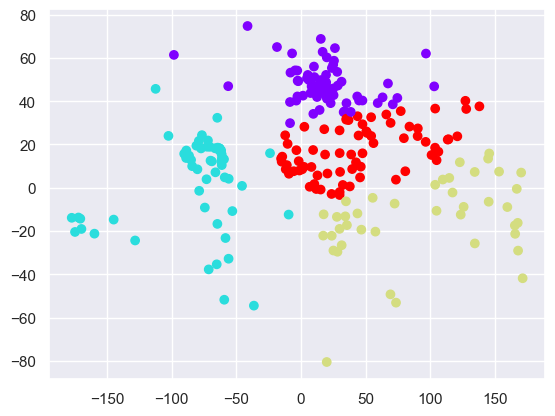

In [23]:
plt.scatter(new_data["Longitude"], new_data["Latitude"], c=new_data["clusterNo"], cmap='rainbow')


### Obtaining the optimal number of clusters

In [25]:
wcss=[]
for i in range(1,11): 
    kmeans = KMeans(i)
    kmeans.fit(cluster_data) 
    wcss_iter = kmeans.inertia_ 
    wcss.append(wcss_iter)


Text(0, 0.5, 'Within-cluster Sum of Squares')

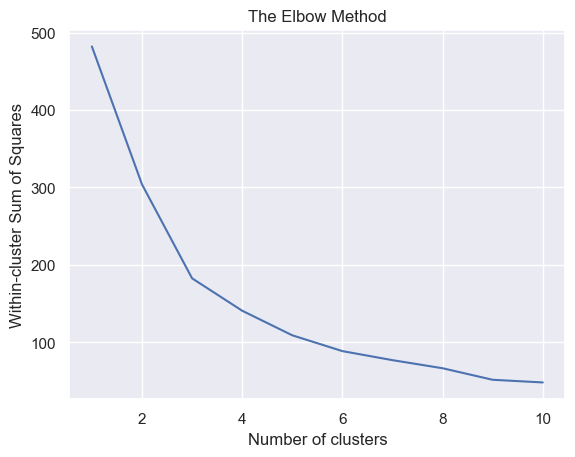

In [26]:
number_clusters = range(1,11)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method') 
plt.xlabel('Number of clusters') 
plt.ylabel('Within-cluster Sum of Squares')